In [ ]:
# Logistic Regression on MNIST Dataset #

In [ ]:
# Increasing the Cell Width of Jupyter Notebook

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
# Importing Libraries

import torch
import requests
import torchvision
import numpy as np
import pandas as pd
import PIL.ImageOps
import seaborn as sns
from PIL import Image
import torch.nn as nn
from tqdm.auto import tqdm
import torch.nn.functional as F
from torchvision.datasets import MNIST
from sklearn.metrics import confusion_matrix
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Downloading the MNIST Dataset

dataset = MNIST(root='data/', download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 432009302.40it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 31496540.26it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 142961207.97it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 23119573.75it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
# Checking Length of the Dataset

len(dataset)

60000

In [ ]:
# Dataset Summary

dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [ ]:
# Sample Information from the Dataset

dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

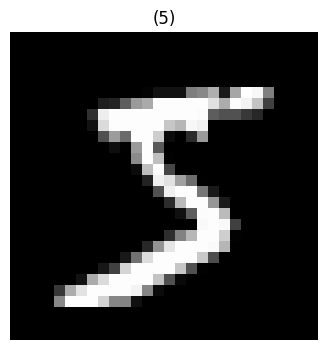

In [ ]:
# Plotting an Image from the Dataset

image, label = dataset[0]
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(f"({label})")
plt.imshow(image, cmap='gray');

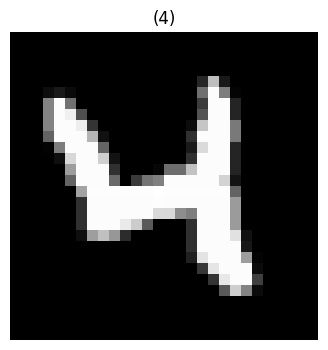

In [ ]:
# Plotting an Image from the Dataset

image, label = dataset[20]
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(f"({label})")
plt.imshow(image, cmap='gray');

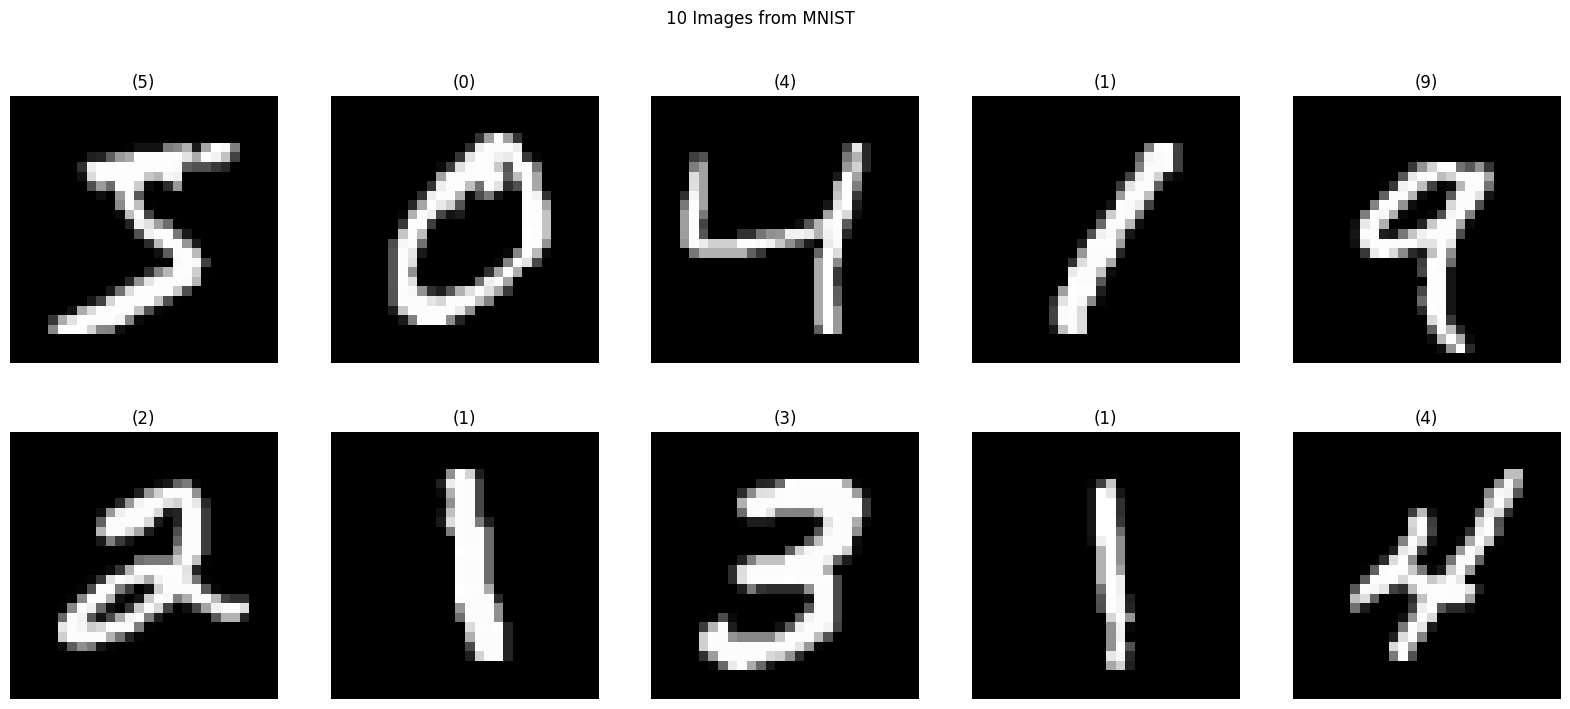

In [ ]:
# Plotting Multiple Images from the Dataset

cols = 5
rows = 2

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 4, rows * 4))

for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    image, label = dataset[i]
    plt.axis('off')
    plt.title(f"({label})")
    plt.imshow(image, cmap='gray');

plt.suptitle(f"{rows * cols} Images from MNIST")
plt.show()

In [ ]:
# Defining Transformation for Datasets and Tensor Image Convertions

transform = transforms.Compose([transforms.Resize((28, 28)),
                                transforms.ToTensor()
                                ])

In [ ]:
# Allocating the Training, Validation and Testing Sets from the MNIST Dataset with Tensor Transformations

train_valid = MNIST(root='data/', train=True, transform=transform)

len_valid = 10000
len_train = len(train_valid) - len_valid

train_ds, valid_ds = random_split(train_valid, [50000, 10000])

test_ds = MNIST(root='data/', train=False, transform=transform)

print(f"Length of Training Dataset   : {len(train_ds)}")
print(f"Length of Validation Dataset : {len(valid_ds)}")
print(f"Length of Testing Dataset    : {len(test_ds)}")

Length of Training Dataset   : 50000
Length of Validation Dataset : 10000
Length of Testing Dataset    : 10000


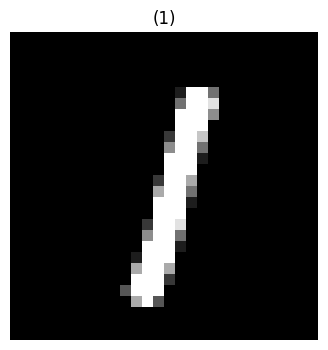

In [ ]:
# Plotting a Tensor Image from the Splitted Training Set

image, label = train_ds[0]
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(f"({label})")
plt.imshow(image.permute(1, 2, 0), cmap='gray');

In [ ]:
# Showing What permute(1, 2, 0) Does to A Tensor Image

image, label = train_ds[0]
print("image.shape                  :", image.shape)
print("image.permute(1, 2, 0).shape :", image.permute(1, 2, 0).shape)

# It is Also Possible to Squeeze the Tensor Image and Remove the Channel Info
print("image.squeeze(0).shape       :", image.squeeze(0).shape)

image.shape                  : torch.Size([1, 28, 28])
image.permute(1, 2, 0).shape : torch.Size([28, 28, 1])
image.squeeze(0).shape       : torch.Size([28, 28])


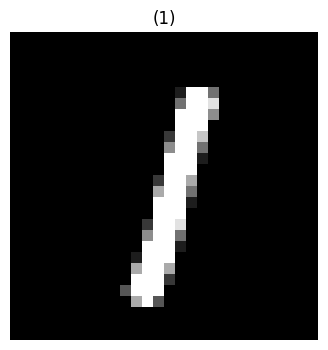

In [ ]:
# Plotting A Squeezed Tensor Image from the Splitted Training Set

image, label = train_ds[0]
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(f"({label})")
plt.imshow(image.squeeze(0), cmap='gray');

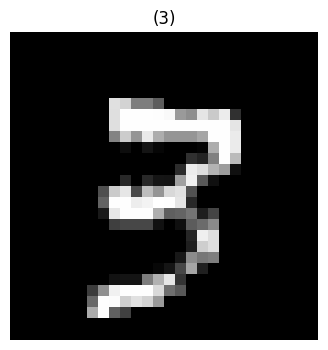

In [ ]:
# Plotting A Tensor Image from the Splitted Validation Set

image, label = valid_ds[0]
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(f"({label})")
plt.imshow(image.permute(1, 2, 0), cmap='gray');

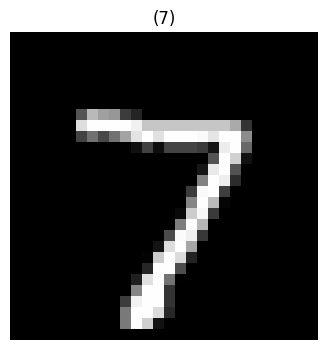

In [ ]:
# Plotting A Tensor Image from the Splitted Testing Set

image, label = test_ds[0]
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(f"({label})")
plt.imshow(image.permute(1, 2, 0), cmap='gray');

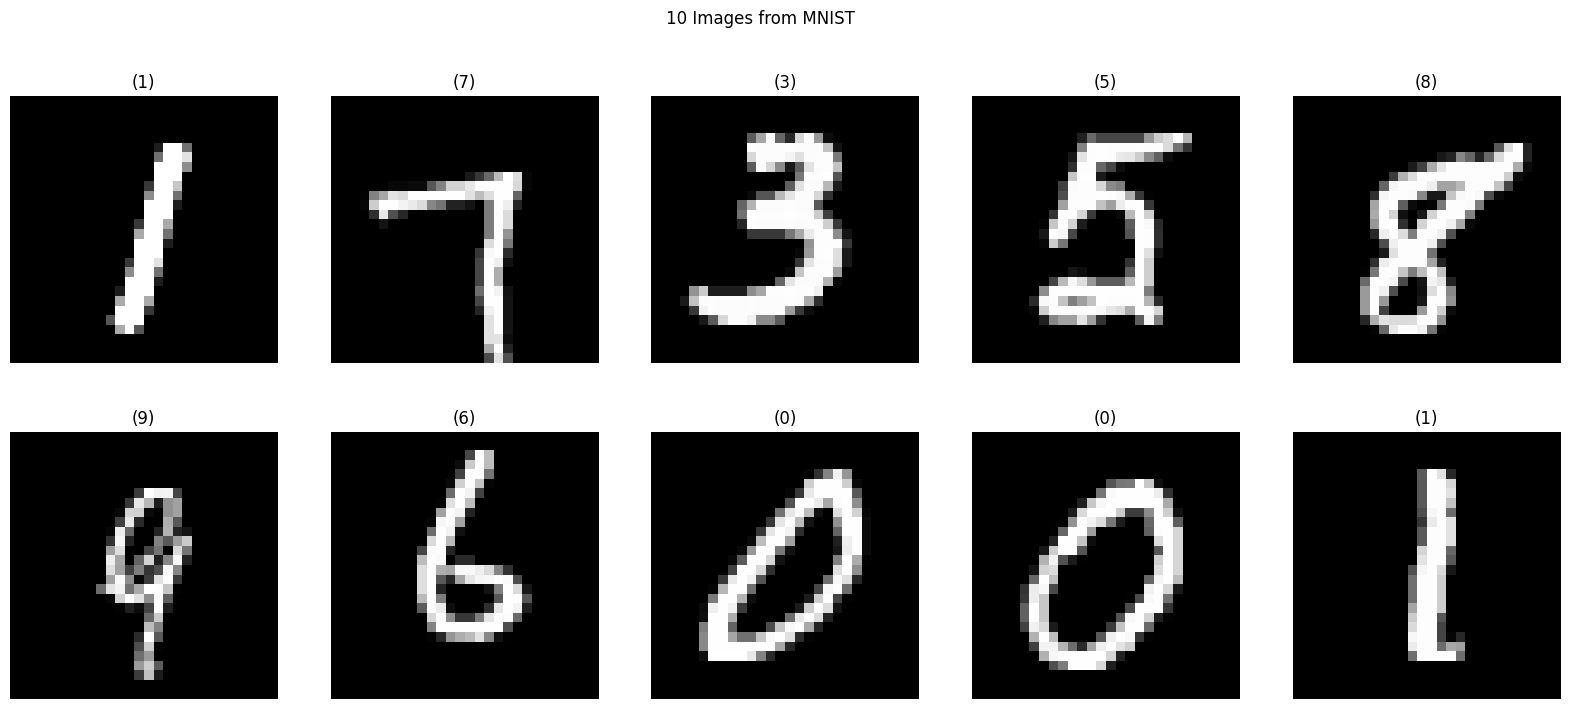

In [ ]:
# Plotting Multiple Tensor Images from the Splitted Sets

cols = 5
rows = 2

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 4, rows * 4))

for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    image, label = train_ds[i]
    # image_tensor, label_tensor = test_ds[i]
    plt.axis('off')
    plt.title(f"({label})")
    plt.imshow(image.permute(1, 2, 0), cmap='gray');

plt.suptitle(f"{rows * cols} Images from MNIST")
plt.show()

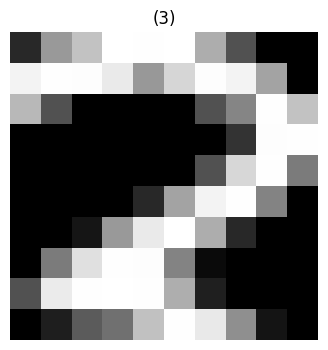

In [ ]:
# Plotting A Specific Region of A Tensor Image from the Splitted Sets

image, label = valid_ds[10]
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(f"({label})")
plt.imshow(image[0, 5:15, 10:20], cmap='gray');

In [ ]:
# Definition of Data Loaders from the Splitted Sets to Load the Data in Batches

batch_size = 128

train_dl = DataLoader(train_ds, batch_size, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size)
test_dl = DataLoader(test_ds, batch_size)

In [ ]:
# Logistic Regression Model

image, label = train_ds[0]
c, h, w = image.size()     # Extracting c, h and w values from a single data sample (image)

# nn.Linear() Expects Each Training Sample to Be a Vector, Each Image is Flattened into a Vector
input_size = c * h * w

# The Output for Each Tensor Image will Be a Vector of Size 10 Where Each Element Signifies the Probability of a Particular Target Label (I.E., 0 to 9).
num_classes = 10

# Logistic Regression Model
model = nn.Linear(input_size, num_classes)

print(f"Model:\n{model}\n")
print(f"Model Weight Size:\n{model.weight.shape}\n")
print(f"Model Bias Size:\n{model.bias.shape}\n")

Model:
Linear(in_features=784, out_features=10, bias=True)

Model Weight Size:
torch.Size([10, 784])

Model Bias Size:
torch.Size([10])



In [ ]:
# Showing the Function of reshape(-1, c * h * w) on A Tensor Image and Printing A Group of Labels from the Dataset

for images, labels in train_dl:

    print("Images Before Reshape:", images.size(), end="\n\n")

    b, c, h, w = images.size()
    images = images.reshape(-1, c * h * w)
    print("Images After Reshape:", images.size(), end="\n\n")

    print(f"Labels:\n{labels}\n")

    outputs = model(images)
    print(f"Outputs:\n{outputs}")

    break

Images Before Reshape: torch.Size([128, 1, 28, 28])

Images After Reshape: torch.Size([128, 784])

Labels:
tensor([7, 3, 5, 4, 7, 0, 8, 1, 4, 5, 7, 8, 5, 0, 7, 2, 6, 3, 9, 2, 4, 8, 5, 6,
        1, 4, 4, 7, 6, 1, 5, 8, 6, 9, 6, 6, 2, 2, 7, 3, 2, 4, 2, 9, 9, 7, 5, 9,
        0, 7, 1, 5, 7, 0, 2, 2, 9, 9, 7, 0, 7, 4, 2, 6, 1, 2, 1, 9, 8, 5, 2, 3,
        6, 7, 6, 6, 1, 9, 2, 1, 2, 0, 1, 0, 4, 1, 6, 7, 1, 2, 6, 9, 9, 3, 1, 9,
        1, 1, 1, 4, 4, 3, 1, 7, 7, 9, 4, 9, 5, 1, 4, 4, 1, 9, 3, 8, 8, 1, 3, 6,
        7, 3, 4, 7, 7, 5, 9, 4])

Outputs:
tensor([[ 0.0104, -0.0893,  0.0084,  ..., -0.1719, -0.0718, -0.0868],
        [ 0.1867,  0.2316,  0.1569,  ..., -0.2856, -0.5156,  0.1746],
        [ 0.1649,  0.1985,  0.3067,  ..., -0.0286, -0.0733,  0.1025],
        ...,
        [ 0.5046,  0.2433,  0.2536,  ..., -0.3376, -0.5041,  0.0006],
        [-0.1504,  0.1424,  0.0502,  ..., -0.1837, -0.0172,  0.1630],
        [-0.2631, -0.1204,  0.1412,  ..., -0.0661, -0.2767, -0.0587]],
       grad_fn=<

In [ ]:
# The Functionality of the "nn.Module" Class from PyTorch is Extended to Define a Custom Model

class MnistModel(nn.Module):
    # Inside the __init__(self) Constructor, Weights and Biases are Initialized Using nn.Linear()
    def __init__(self, in_size, out_size):
        super().__init__()
        self.linear = nn.Linear(in_size, out_size)

    # Inside the forward(self, x) Method, Input Tensor is Flattened and Passed to self.linear()
    def forward(self, x):
        b, c, h, w = x.size()
        x = x.reshape(-1, c * h * w)
        out = self.linear(x)
        return out

In [ ]:
# Creating the Model with the Required Parameters

image, label = train_ds[0]
c, h, w = image.size()
input_size = c * h * w
num_classes = 10

model = MnistModel(input_size, num_classes)
print(model)

MnistModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [ ]:
# Checking If the Model is Sent to the Device

next(model.parameters()).is_cuda

False

In [ ]:
# Using the New Custom Model for Batch Loading

for images, labels in train_dl:

    outputs = model(images)

    print(f"Images Shape:\n{images.shape}\n")
    print(f"Sample Images:\n{images[:2].data}\n")

    print(f"Outputs Shape:\n{outputs.shape}\n")
    print(f"Sample Outputs:\n{outputs[:2].data}")

    break

Images Shape:
torch.Size([128, 1, 28, 28])

Sample Images:
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])

Outputs Shape:
torch.Size([128, 10])

Sample Outputs:
tensor([[ 0.0363, -0.2513,  0.0826, -0.1841, -0.3383,  0.1866,  0.0152,  0.1602,
          0.2927,  0.0188],
        [-0.1356,  0.2770,  0.0319, -0.1949, -0.1358, -0.1535, -0.0590,  0.0860,
         -0.1423,  0.0173]])


In [ ]:
# The First Element of the First Batch (128) with 10 Probability Values (Outputs)

outputs[0]

tensor([ 0.0363, -0.2513,  0.0826, -0.1841, -0.3383,  0.1866,  0.0152,  0.1602,
         0.2927,  0.0188], grad_fn=<SelectBackward0>)

In [ ]:
# All the Elements of outputs[0] can Be Made Positive

exps = torch.exp(outputs[0])
print(exps)

tensor([1.0370, 0.7778, 1.0861, 0.8318, 0.7130, 1.2051, 1.0153, 1.1738, 1.3400,
        1.0190], grad_fn=<ExpBackward0>)


In [ ]:
# Making All the Positive Elements Between 0 and 1

probs = exps / torch.sum(exps)
print(f"Probabilities:\n{probs}\n")

print(f"Sum of Probabilities: {torch.sum(probs)}")

Probabilities:
tensor([0.1017, 0.0763, 0.1065, 0.0816, 0.0699, 0.1182, 0.0995, 0.1151, 0.1314,
        0.0999], grad_fn=<DivBackward0>)

Sum of Probabilities: 1.0


In [ ]:
# Applying Softmax() Function on Each Output Row to Make All the Row Elements Between 0 and 1
probs = nn.Softmax(dim=1)(outputs)

# Looking at the Sample Probabilities
print(f"Sample Probabilities:\n{probs[:2].data}\n")  # Show the First Two Output Lists

# Adding up All the Probabilities in an Output Row
print(f"Sum of probs[0]  : {torch.sum(probs[0]).item()}")
print(f"Sum of probs[1]  : {torch.sum(probs[1]).item()}")
print(f"Sum of probs[2]  : {torch.sum(probs[2]).item()}")
print(". . .")
print(f"Sum of probs[{batch_size-1}]: {torch.sum(probs[batch_size-1]).item()}")

Sample Probabilities:
tensor([[0.1017, 0.0763, 0.1065, 0.0816, 0.0699, 0.1182, 0.0995, 0.1151, 0.1314,
         0.0999],
        [0.0901, 0.1361, 0.1065, 0.0849, 0.0900, 0.0885, 0.0972, 0.1124, 0.0895,
         0.1049]])

Sum of probs[0]  : 0.9999998807907104
Sum of probs[1]  : 1.0
Sum of probs[2]  : 1.0
. . .
Sum of probs[127]: 1.0


In [ ]:
# Printing the Max Probabilities, Predictions and Labels

max_probs, preds = torch.max(probs, dim=1)

print(f"Max Probabilities:\n{max_probs}\n")
print(f"Predictions:\n{preds}\n")
print(f"Labels:\n{labels}\n")
print(f"Differences:\n{preds-labels}")

Max Probabilities:
tensor([0.1314, 0.1361, 0.1266, 0.1298, 0.1351, 0.1373, 0.1323, 0.1227, 0.1477,
        0.1510, 0.1213, 0.1128, 0.1447, 0.1194, 0.1434, 0.1186, 0.1445, 0.1258,
        0.1235, 0.1508, 0.1221, 0.1610, 0.1228, 0.1602, 0.1247, 0.1247, 0.1307,
        0.1254, 0.1177, 0.1562, 0.1280, 0.1660, 0.1157, 0.1317, 0.1358, 0.1632,
        0.1731, 0.1219, 0.1661, 0.1661, 0.1355, 0.1311, 0.1185, 0.1219, 0.1287,
        0.1317, 0.1428, 0.1258, 0.1147, 0.1258, 0.1237, 0.1167, 0.1145, 0.1409,
        0.1097, 0.1126, 0.1195, 0.1320, 0.1330, 0.1386, 0.1306, 0.1340, 0.1266,
        0.1145, 0.1172, 0.1308, 0.1482, 0.1429, 0.1230, 0.1334, 0.1350, 0.1295,
        0.1207, 0.1558, 0.1264, 0.1340, 0.1183, 0.1346, 0.1404, 0.1209, 0.1241,
        0.1320, 0.1255, 0.1340, 0.1645, 0.1359, 0.1326, 0.1504, 0.1203, 0.1461,
        0.1335, 0.1241, 0.1372, 0.1260, 0.1275, 0.1181, 0.1341, 0.1253, 0.1103,
        0.1188, 0.1215, 0.1168, 0.1357, 0.1238, 0.1431, 0.1132, 0.1162, 0.1337,
        0.1400, 0.134

In [ ]:
# When the Model Predicts Well, Most of the Elements in the "Differences" Tensor will be 0

In [ ]:
# Simple Accuracy Calculation

print(f"True Predictions in the First Batch    : {torch.sum(preds == labels).item()}")
print(f"All the Predictions in the First Batch : {len(preds)}")
print(f"Probability of the True Predictions    : {torch.sum(preds == labels).item() / len(preds)}")

True Predictions in the First Batch    : 10
All the Predictions in the First Batch : 128
Probability of the True Predictions    : 0.078125


In [ ]:
##############################################
### Defining Necessary Functions for MNIST ###
##############################################

In [ ]:
# Definition of accuracy() Function

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
# Accuracy for the Current Batch of Data

acc = accuracy(outputs, labels)

print(f"Accuracy: {acc}")

Accuracy: 0.078125


In [ ]:
# Definition of Loss Function

loss_fn = nn.CrossEntropyLoss()

In [ ]:
# Evaluating Loss Function for the Current Batch of Data

loss = loss_fn(outputs, labels)
print(f"Loss: {loss.item()}")

Loss: 2.307158946990967


In [ ]:
# Definition of the Full MNistModel Class with All the Necessary Functions

class MnistModel(nn.Module):
    def __init__(self, in_size, out_size):
        super().__init__()
        # Single (Output) Layer
        self.linear = nn.Linear(in_size, out_size)

    def forward(self, x):
        # Flatten the Image Tensors
        b, c, h, w = x.size()
        x = x.reshape(-1, c * h * w)
        # Get Predictions Using the Output Layer
        out = self.linear(x)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                          # Generate Predictions
        loss = nn.CrossEntropyLoss()(out, labels)   # Evaluate Loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                          # Generate Predictions
        loss = nn.CrossEntropyLoss()(out, labels)   # Evaluate Loss
        acc = accuracy(out, labels)                 # Evaluate Accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine Losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine Accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, epochs, result):
        print("Epoch [{}/{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch+1, epochs, result['val_loss'], result['val_acc']))

In [ ]:
# Creating the Model with the Necessary Parameters

image, label = train_ds[0]
c, h, w = image.size()
input_size = c * h * w
num_classes = 10

model = MnistModel(input_size, num_classes)
print(model)

MnistModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [ ]:
for t in model.parameters():
    print(t.shape)

torch.Size([10, 784])
torch.Size([10])


In [ ]:
# Definition of Device Loader Functions to Send Data Loaders to the Current Device (GPU) Before Training

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def to_device(data, device):
    # Move Tensor(s) to Chosen Device
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)


class DeviceDataLoader():
    # Wrap a Dataloader to Move Data to a Device
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        # Yield a Batch of Data After Moving it to Device
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        # Number of Batches
        return len(self.dl)

In [ ]:
# Testing the "to_device()" Function

for images, labels in train_dl:
    print(f"images.shape: {images.shape}")
    print(f"{batch_size} images are Currently at: {images.device}")
    images = to_device(images, device)
    print(f"\n{batch_size} images are Sent to: {images.device}")
    break

images.shape: torch.Size([128, 1, 28, 28])
128 images are Currently at: cpu

128 images are Sent to: cuda:0


In [ ]:
# Sending Dataset Loaders to the Current Device

train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)
test_dl = DeviceDataLoader(test_dl, device)

In [ ]:
# Checking the Current Device of Data Loaders

for images, labels in valid_dl:
    print(f"images.device: {images.device}")
    print(f"labels.device: {labels.device}")
    break

images.device: cuda:0
labels.device: cuda:0


In [ ]:
# Functions to Train and Test the Model

def evaluate(model, valid_dl):
    """Evaluate the Model's Performance on the Validation Set"""
    outputs = [model.validation_step(batch) for batch in tqdm(valid_dl, desc="Evaluation")]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_dl, valid_dl, opt_func=torch.optim.SGD):
    """Train the Model Using Gradient Descent"""
    optimizer = opt_func(model.parameters(), lr)
    history = []  # For Recording Epoch-Wise Results

    for epoch in range(epochs):

        # Training Phase
        model.train()
        for batch in tqdm(train_dl, desc=f"Epoch [{epoch+1}/{epochs}]"):
            optimizer.zero_grad()
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()

        # Validation phase
        model.eval()
        with torch.no_grad():
            result = evaluate(model, valid_dl)
            model.epoch_end(epoch, epochs, result)
            history.append(result)

    return history

In [ ]:
# Sending the Model to the Device

model = to_device(model, device)

In [ ]:
# Checking If the Model is Sent to the Device

next(model.parameters()).is_cuda

True

In [ ]:
# Evaluation of the Model Before Training

model.eval()
with torch.no_grad():
    result = evaluate(model, valid_dl)
result

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

{'val_loss': 2.271327257156372, 'val_acc': 0.1497230976819992}

In [ ]:
# Training the Model with 0.5 Learning Rate for 10 Epochs

history = fit(10, 0.5, model, train_dl, valid_dl)

Epoch [1/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [1/10], val_loss: 0.3462, val_acc: 0.9012


Epoch [2/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [2/10], val_loss: 0.3264, val_acc: 0.9077


Epoch [3/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [3/10], val_loss: 0.3218, val_acc: 0.9113


Epoch [4/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [4/10], val_loss: 0.3086, val_acc: 0.9131


Epoch [5/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [5/10], val_loss: 0.3138, val_acc: 0.9108


Epoch [6/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [6/10], val_loss: 0.3095, val_acc: 0.9133


Epoch [7/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [7/10], val_loss: 0.3047, val_acc: 0.9147


Epoch [8/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [8/10], val_loss: 0.3059, val_acc: 0.9168


Epoch [9/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [9/10], val_loss: 0.3078, val_acc: 0.9156


Epoch [10/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [10/10], val_loss: 0.2963, val_acc: 0.9184


In [ ]:
# Training the Model with 0.1 Learning Rate for 10 Epochs

history += fit(10, 0.1, model, train_dl, valid_dl)

Epoch [1/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [1/10], val_loss: 0.2927, val_acc: 0.9182


Epoch [2/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [2/10], val_loss: 0.2925, val_acc: 0.9181


Epoch [3/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [3/10], val_loss: 0.2931, val_acc: 0.9180


Epoch [4/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [4/10], val_loss: 0.2921, val_acc: 0.9180


Epoch [5/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [5/10], val_loss: 0.2917, val_acc: 0.9185


Epoch [6/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [6/10], val_loss: 0.2927, val_acc: 0.9182


Epoch [7/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [7/10], val_loss: 0.2915, val_acc: 0.9184


Epoch [8/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [8/10], val_loss: 0.2915, val_acc: 0.9192


Epoch [9/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [9/10], val_loss: 0.2927, val_acc: 0.9183


Epoch [10/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [10/10], val_loss: 0.2910, val_acc: 0.9197


In [ ]:
# Training the Model with 0.05 Learning Rate for 10 Epochs

history += fit(10, 0.05, model, train_dl, valid_dl)

Epoch [1/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [1/10], val_loss: 0.2909, val_acc: 0.9187


Epoch [2/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [2/10], val_loss: 0.2914, val_acc: 0.9197


Epoch [3/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [3/10], val_loss: 0.2914, val_acc: 0.9194


Epoch [4/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [4/10], val_loss: 0.2910, val_acc: 0.9183


Epoch [5/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [5/10], val_loss: 0.2909, val_acc: 0.9194


Epoch [6/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [6/10], val_loss: 0.2911, val_acc: 0.9188


Epoch [7/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [7/10], val_loss: 0.2912, val_acc: 0.9193


Epoch [8/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [8/10], val_loss: 0.2910, val_acc: 0.9194


Epoch [9/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [9/10], val_loss: 0.2911, val_acc: 0.9197


Epoch [10/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [10/10], val_loss: 0.2913, val_acc: 0.9199


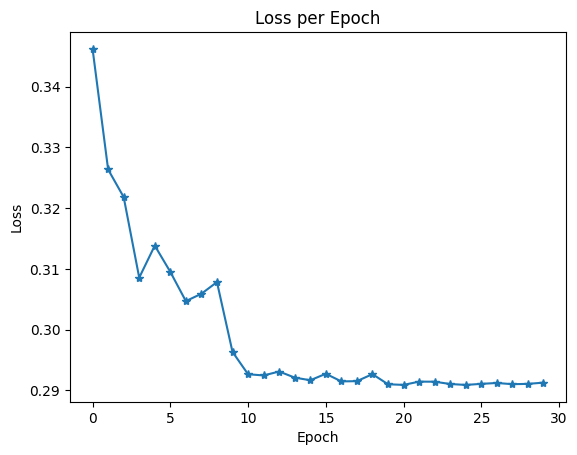

In [ ]:
# Plotting Loss Values per Epoch

losses = [result['val_loss'] for result in history]
plt.plot(losses, '-*')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch');

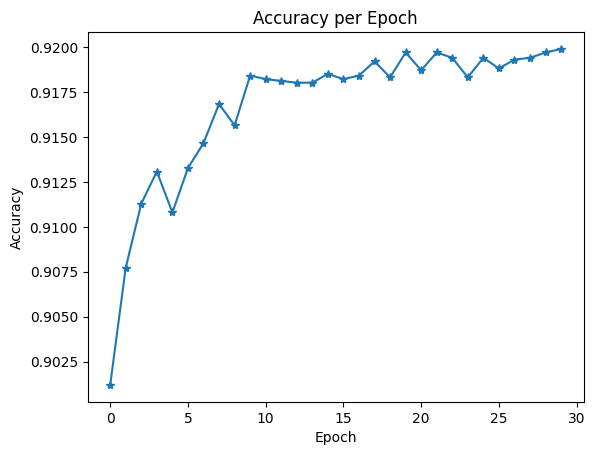

In [ ]:
# Plotting Accuracy Values per Epoch

accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-*')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch');

In [ ]:
# The Final Loss & Accuracy Element of the "history" List for Validation Set

history[-1]

{'val_loss': 0.29127195477485657, 'val_acc': 0.9198971390724182}

In [ ]:
# Re-Evaluating the Trained Model with Testing Set

model.eval()
with torch.no_grad():
    result = evaluate(model, test_dl)
print(result)

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

{'val_loss': 0.26610103249549866, 'val_acc': 0.9235561490058899}


In [ ]:
# Label Prediction Function for the Tensor Images

def predict_image(img, model):
    model.eval()
    with torch.no_grad():
        image = img.unsqueeze(0)
        preds = model(image)
        _, max_preds = torch.max(preds, 1)
    return max_preds[0].item()

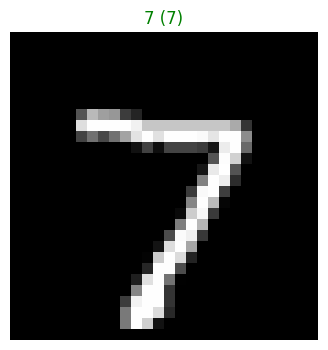

In [ ]:
# Plotting A Tensor Image from the "test_ds" Set

image, label = test_ds[0]
image = to_device(image, device)
pred = predict_image(image, model)
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(f"{pred} ({label})", color=("green" if pred==label else "red"))
plt.imshow(image.cpu().permute(1, 2, 0), cmap='gray');

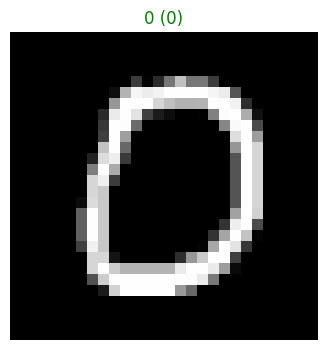

In [ ]:
# Plotting A Tensor Image from the "test_ds" Set

image, label = test_ds[10]
image = to_device(image, device)
pred = predict_image(image, model)
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(f"{pred} ({label})", color=("green" if pred==label else "red"))
plt.imshow(image.cpu().permute(1, 2, 0), cmap='gray');

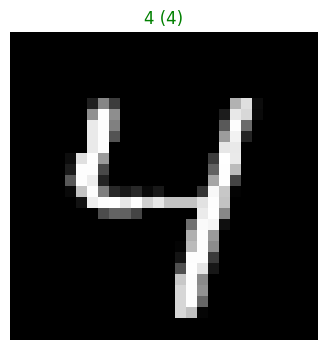

In [ ]:
# Plotting A Tensor Image from the "test_ds" Set

image, label = test_ds[210]
image = to_device(image, device)
pred = predict_image(image, model)
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(f"{pred} ({label})", color=("green" if pred==label else "red"))
plt.imshow(image.cpu().permute(1, 2, 0), cmap='gray');

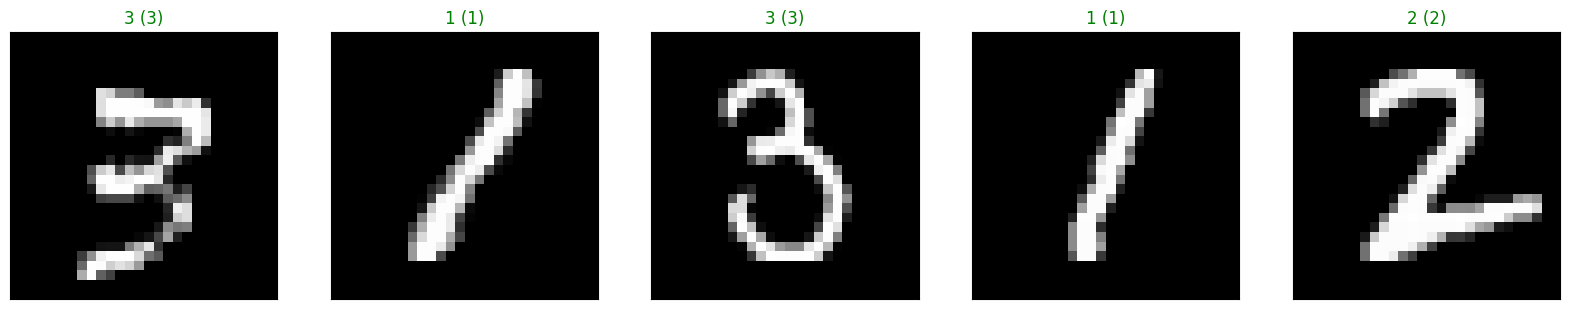

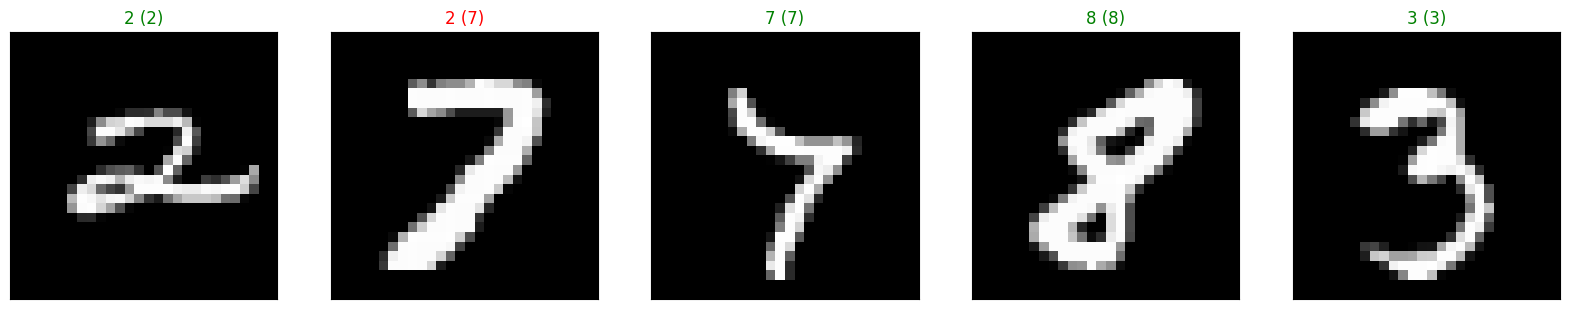

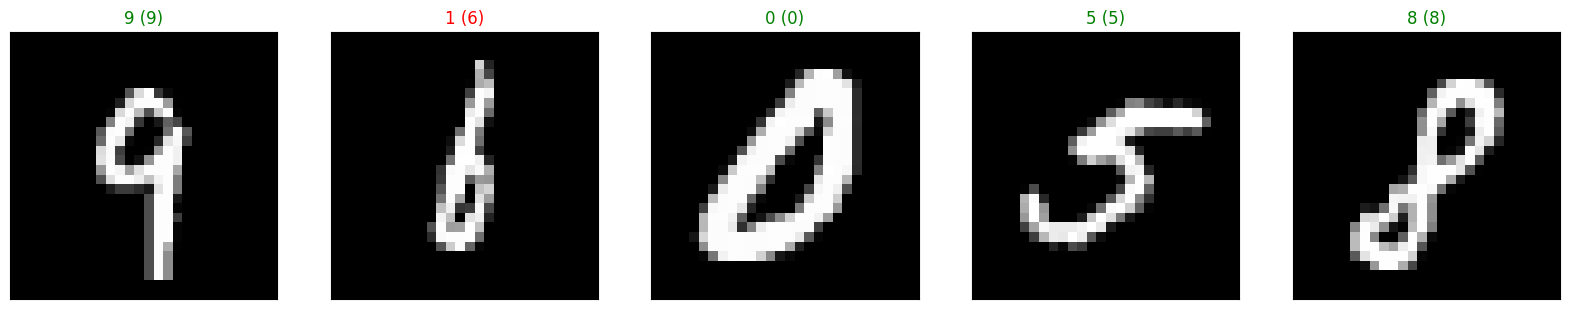

In [ ]:
# Getting Images & Labels from One Batch
#dataiter = iter(valid_loader)
#images, labels = next(dataiter)

i = 0
# Getting Images & Labels from Different Batches
for images, labels in valid_dl:

    output = model(images)
    _, preds = torch.max(output, 1)

    col = 5
    row = 1     # Get 1 Row from Each Batch

    fig = plt.figure(figsize=(col * 4, row * 4))

    for idx in np.arange(row * col):
        ax = fig.add_subplot(row, col, idx+1, xticks=[], yticks=[])
        plt.imshow(images[idx].cpu().permute(1, 2, 0), cmap='gray')
        ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red"))

    i += 1
    if i == 3:
        break   # Get 1 Row From 3 Different Batches

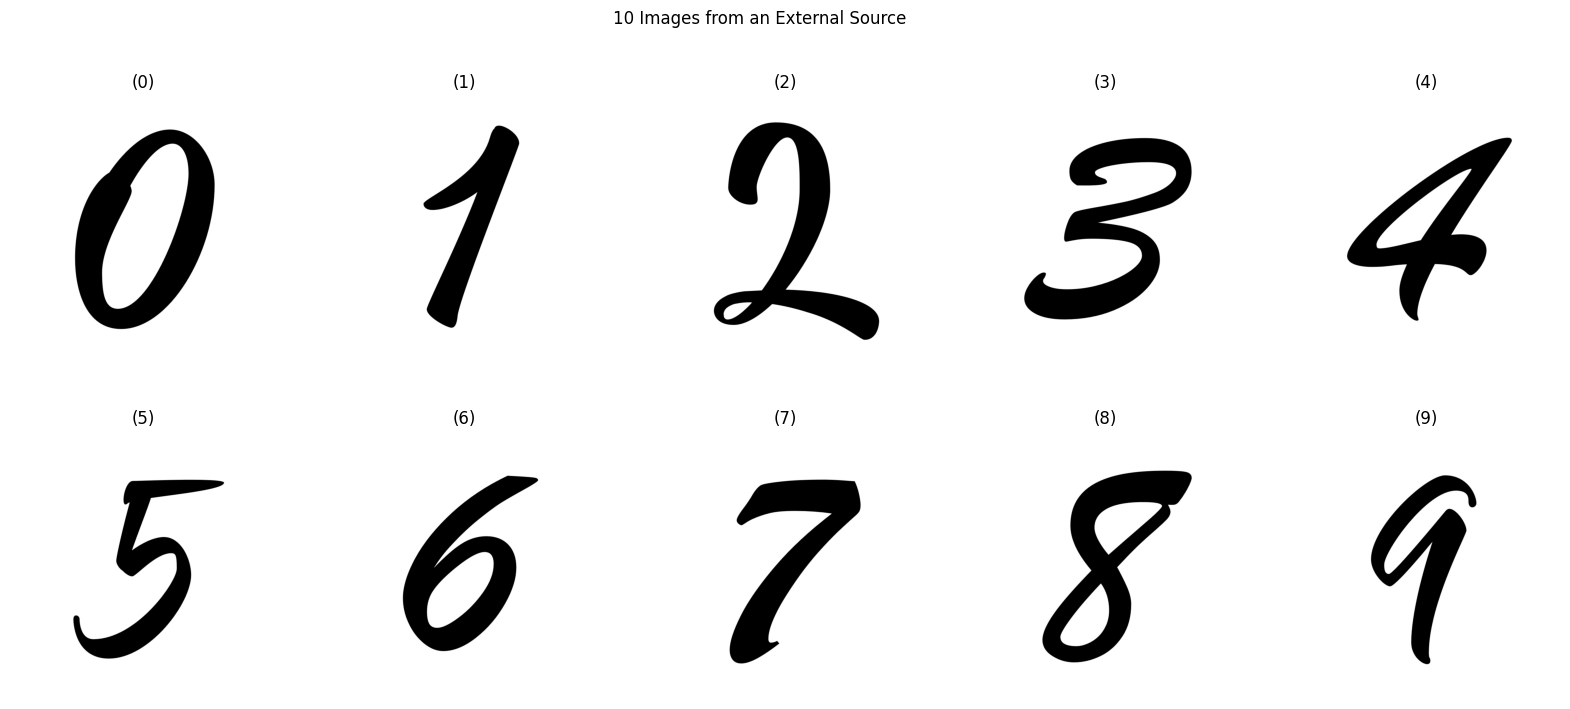

In [ ]:
# Getting Real Number Images from an External Source to Transfrom Them into Handwritten-Like Numbers and Predict Their Label Values

'''
url = []
# Comment out Here If the Images will Be Directly Loaded from Local Files
url.append("url_of_number_0_image")  # (0)
url.append("url_of_number_1_image")  # (1)
url.append("url_of_number_2_image")  # (2)
url.append("url_of_number_3_image")  # (3)
url.append("url_of_number_4_image")  # (4)
url.append("url_of_number_5_image")  # (5)
url.append("url_of_number_6_image")  # (6)
url.append("url_of_number_7_image")  # (7)
url.append("url_of_number_8_image")  # (8)
url.append("url_of_number_9_image")  # (9)
'''

img_ = []
lbl = []

# Comment out This Loop If the Images will Be Directly Loaded from Local Files
'''
for i, link in enumerate(url):
    response = requests.get(link, stream=True)
    img_.append(Image.open(response.raw))
    lbl.append(i)
'''

# # Use This Loop If the Images will Be Directly Loaded from Local Files
for i in range(0, 10):
    img_.append(Image.open(f"./ExternalNumbers/{i}.jpg"))
    lbl.append(i)

cols = 5
rows = 2

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 4, rows * 4))

for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.axis('off')
    plt.title(f"({lbl[i]})")
    plt.imshow(img_[i], cmap='gray');

plt.suptitle(f"{rows * cols} Images from an External Source")
plt.show()

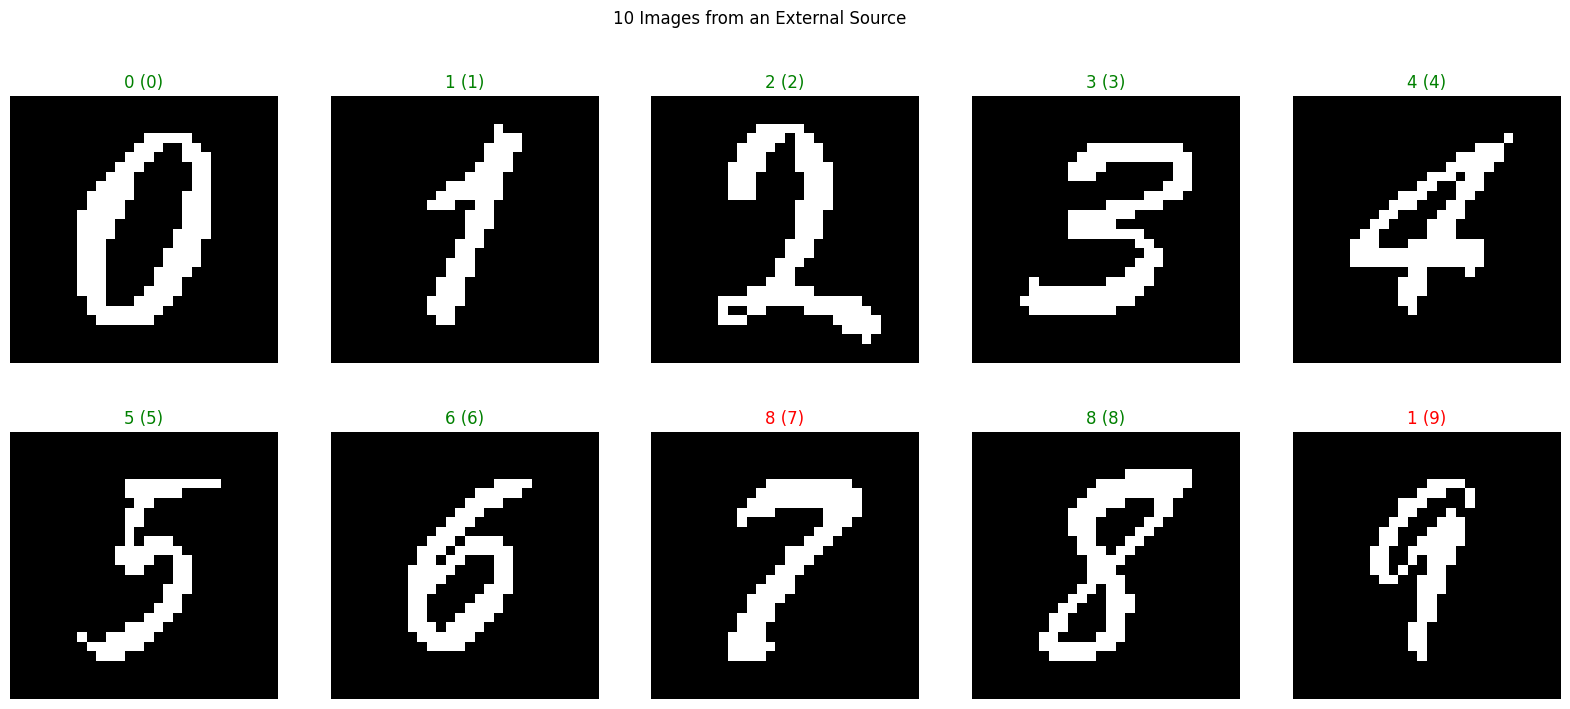

In [ ]:
# Transforming the External-Source Numbers and Predicting Their Labels

prd = []
img = []
for im_ in img_:
    image = PIL.ImageOps.invert(im_)  # Invertion (i.e. Making White Black and Vice Versa)
    image = image.convert('1')        # Convert from RGB to Gray
    image = transform(image)          # Apply the Transform Function Defined Earlier to Make the External Images the Same as the Training Data
    img.append(image)
    image = to_device(image, device)
    prd.append(predict_image(image, model))

cols = 5
rows = 2

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 4, rows * 4))

for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.axis('off')
    plt.title(f"{prd[i]} ({lbl[i]})", color=("green" if prd[i]==lbl[i] else "red"))
    plt.imshow(img[i].cpu().permute(1, 2, 0), cmap='gray');

plt.suptitle(f"{rows * cols} Images from an External Source")
plt.show()

Making Predictions:   0%|          | 0/79 [00:00<?, ?it/s]

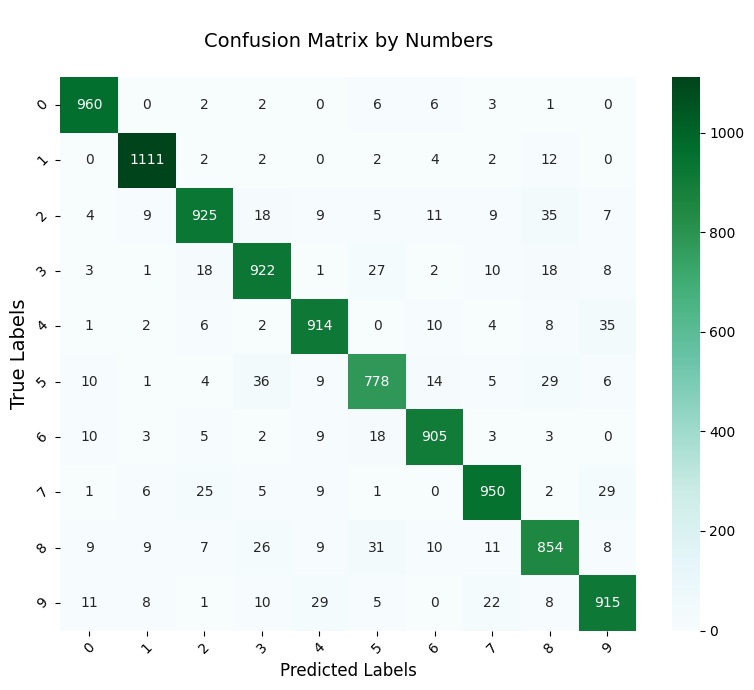

In [ ]:
# Confusion Matrix by Numbers

y_pred = []
y_true = []

model.eval()
with torch.no_grad():
    for inputs, labels in tqdm(test_dl, desc="Making Predictions"):
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_pred.extend(preds.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculating Confusion Matrix
cf_matrix = confusion_matrix(y_true, y_pred)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

df_cm = pd.DataFrame(cf_matrix, class_names, class_names)

plt.figure(figsize=(8, 7))
sns.heatmap(df_cm, annot=True, cmap="BuGn", fmt='g')
plt.title("\nConfusion Matrix by Numbers\n", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xlabel("Predicted Labels", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

Making Predictions:   0%|          | 0/79 [00:00<?, ?it/s]

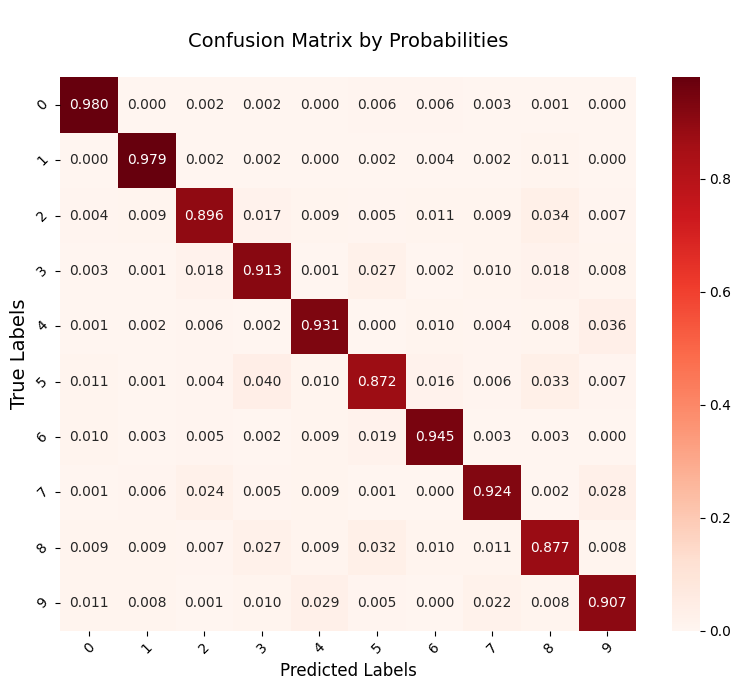

In [ ]:
# Confusion Matrix by Probabilities

y_pred = []
y_true = []

model.eval()
with torch.no_grad():
    for inputs, labels in tqdm(test_dl, desc="Making Predictions"):
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_pred.extend(preds.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculating Confusion Matrix
cf_matrix = confusion_matrix(y_true, y_pred)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], class_names, class_names)

plt.figure(figsize=(8, 7))
sns.heatmap(df_cm, annot=True, cmap='Reds', fmt=".3f")
plt.title("\nConfusion Matrix by Probabilities\n", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xlabel("Predicted Labels", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Using the Trained Model for Batch Loading from test_dl

model.eval()
with torch.no_grad():
    for images, labels in test_dl:
        outputs = model(images)
        break

print(f"Sample Outputs:\n{outputs[:1].data}")

Sample Outputs:
tensor([[ -0.0601, -10.7907,   1.6159,   6.2427,  -3.2096,   0.9384, -10.0592,
          11.4123,   0.4942,   3.3057]], device='cuda:0')


In [ ]:
# Applying Softmax() Function for Each Output Row
probs = nn.Softmax(dim=1)(outputs)
#probs = F.softmax(outputs, dim=1)

# Looking at Sample Probabilities
print("Sample Probabilities:\n", probs[:1].data)

# Adding up the Probabilities of An Output Row
print("\nSum of probs[0]:", torch.sum(probs[:1]).item())

Sample Probabilities:
 tensor([[1.0350e-05, 2.2630e-10, 5.5314e-05, 5.6522e-03, 4.4373e-07, 2.8092e-05,
         4.7030e-10, 9.9394e-01, 1.8018e-05, 2.9971e-04]], device='cuda:0')

Sum of probs[0]: 0.9999999403953552


In [ ]:
# Analysis of Truth Labels & Predicted Labels

max_probs, preds = torch.max(probs, dim=1)
print(f"Labels:\n{labels}\n")
print(f"Predictions:\n{preds}\n")
print(f"Differences:\n{preds-labels}\n")
print(f"Max Probabilities:\n{max_probs}")

Labels:
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2,
        5, 4, 7, 6, 7, 9, 0, 5], device='cuda:0')

Predictions:
tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 4, 7, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4,
        1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2,
        5, 4, 7, 6, 4, 9, 0, 5], device='cuda:0')

Differences:
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0, 

In [ ]:
# Most of the Elements in the "Differences" Tensor are Zero (0) Now

In [ ]:
# Simple Accuracy Calculation

print(f"True Predictions in the First Batch    : {torch.sum(preds == labels).item()}")
print(f"All the Predictions in the First Batch : {len(preds)}")
print(f"Probability of the True Predictions    : {torch.sum(preds == labels).item() / len(preds)}")

True Predictions in the First Batch    : 122
All the Predictions in the First Batch : 128
Probability of the True Predictions    : 0.953125


In [ ]:
# Saving the Trained Model

torch.save(model.state_dict(), 'logistic_mnist.pth')

In [ ]:
# Creating a New Model to Load the Saved Weights

model_new = MnistModel(input_size, num_classes)
model = to_device(model_new, device)
if next(model.parameters()).is_cuda:
    print("Model is at CUDA")

Model is at CUDA


In [ ]:
model_new.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0226, -0.0188,  0.0176,  ..., -0.0002, -0.0302, -0.0275],
                      [ 0.0235,  0.0308,  0.0079,  ...,  0.0206, -0.0207,  0.0082],
                      [ 0.0228,  0.0054, -0.0143,  ..., -0.0118, -0.0305,  0.0325],
                      ...,
                      [ 0.0351, -0.0218, -0.0323,  ..., -0.0021,  0.0055,  0.0176],
                      [-0.0023,  0.0017, -0.0046,  ...,  0.0310,  0.0207,  0.0303],
                      [-0.0301, -0.0001,  0.0259,  ..., -0.0307, -0.0088, -0.0201]],
                     device='cuda:0')),
             ('linear.bias',
              tensor([-0.0050, -0.0239,  0.0055, -0.0310,  0.0320,  0.0149,  0.0218, -0.0238,
                      -0.0015,  0.0060], device='cuda:0'))])

In [ ]:
# Evaluating the New Model

model_new.eval()
with torch.no_grad():
    result_new = evaluate(model_new, test_dl)
print(result_new)

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

{'val_loss': 2.3317370414733887, 'val_acc': 0.08544303476810455}


In [ ]:
# Loading the Saved Weights to the New Model

model_new.load_state_dict(torch.load('logistic_mnist.pth'))

<All keys matched successfully>

In [ ]:
model_new.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0299,  0.0108,  0.0041,  ..., -0.0133, -0.0046, -0.0092],
                      [-0.0280,  0.0198,  0.0219,  ...,  0.0321, -0.0042, -0.0187],
                      [ 0.0196, -0.0170, -0.0302,  ..., -0.0344, -0.0039,  0.0153],
                      ...,
                      [ 0.0148,  0.0070, -0.0146,  ..., -0.0312, -0.0350, -0.0040],
                      [ 0.0307, -0.0118,  0.0316,  ..., -0.0169, -0.0016,  0.0007],
                      [-0.0330, -0.0348, -0.0307,  ...,  0.0249, -0.0337, -0.0127]],
                     device='cuda:0')),
             ('linear.bias',
              tensor([-0.7843,  0.5504,  0.2412, -0.5085, -0.0707,  2.1713, -0.2779,  1.2402,
                      -2.1365, -0.4822], device='cuda:0'))])

In [ ]:
# The Result of Evaluation from the Saved Model

model_new.eval()
with torch.no_grad():
    result_new = evaluate(model_new, test_dl)
print(result_new)

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

{'val_loss': 0.26610103249549866, 'val_acc': 0.9235561490058899}


In [ ]:
# Re-Evaluating the Trained Original Model with the Testing Set

model.eval()
with torch.no_grad():
    result = evaluate(model, test_dl)
print(result)

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

{'val_loss': 0.26610103249549866, 'val_acc': 0.9235561490058899}


In [ ]:
# Removing the "data" Folder, "ExternalNumbers" Folder and the "logistic_mnist.pth" File (Optional)

import os, shutil

def remove_path(path):
    if os.path.isdir(path):
        shutil.rmtree(path)
    elif os.path.isfile(path):
        os.remove(path)

remove_path("data")
remove_path("ExternalNumbers")
remove_path("logistic_mnist.pth")

In [ ]:
# Terminating the Session (for Colab Runtime)

from google.colab import runtime
runtime.unassign()